# SHARK TANK INDIA EDA

This is an Exploratory Data Analysis on the popular TV show Shark Tank India. I got the dataset from kaggle. The dataset consits of information such as the portfolio of different sharks, states from where the pitchers have come, gross margin and valuation offered to the startups.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

In [37]:
shark_tank = pd.read_csv("C:/Users/CHIRA/Downloads/Shark Tank India.csv")
shark_tank.sample(10)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
95,1,30,Sharks Ki Expertise,96,Kabaddi Adda,Sports,All-Kabaddi App,https://www.kabaddiadda.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
120,1,36,Gateway To Shark Tank India,121,Devnagri,Technology,Translation of language content,https://devnagri.com/,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,1,24,A Decade Of Indian Entrepreneurship,76,The Sass Bar,Beauty/Fashion,Gifts Soaps,https://www.thesassbar.com/,1,NaN,...,NaN,NaN,NaN,0.00,0.0,NaN,25.00,17.5,NaN,2.0
12,1,5,Hunt For Interesting Business,13,Revamp Moto,Electrical Vehicles,E-Bike Mitra bud-e RM,https://www.revampmoto.in/,3,3.0,...,50.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
17,1,6,"New Week, New Ideas",18,Hecoll,Beauty/Fashion,Pollution Resistant Fabric - Healthy Cover For...,https://hecoll.com/,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,4,Entrepreneurship Ki Wave,10,Cos IQ,Beauty/Fashion,Intelligent Skincare,https://mycosiq.com/,2,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
29,1,10,Passion About Entrepreneurship,30,EventBeep,Education,Student Community App EdTech,NaN,3,2.0,...,10.0,1.00,NaN,10.00,1.0,NaN,NaN,NaN,NaN,3.0
90,1,28,Meeting The New India Minds,91,Gold Safe Solutions,Manufacturing,Anti-Suicidal Fan Rod,https://www.goldlife.co.in/,2,2.0,...,NaN,NaN,NaN,16.66,10.0,NaN,16.66,10.0,NaN,3.0
111,1,34,Scaling Ambitions,112,Twee in One,Beauty/Fashion,Reversible and convertible clothing,https://tweeinone.com/,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,1,12,Ek Idea Aur Uske Do Sides,35,SweeDesi,Food,Indian Sweets Online,https://www.sweedesi.com/,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
shark_tank.shape

(121, 50)

In [39]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              121 non-null    int64  
 1   Episode Number             121 non-null    int64  
 2   Episode Title              121 non-null    object 
 3   Pitch Number               121 non-null    int64  
 4   Startup Name               121 non-null    object 
 5   Industry                   121 non-null    object 
 6   Business Description       121 non-null    object 
 7   Company Website            112 non-null    object 
 8   Number of Presenters       121 non-null    int64  
 9   Male Presenters            102 non-null    float64
 10  Female Presenters          62 non-null     float64
 11  Couple Presenters          120 non-null    float64
 12  Pitchers Average Age       121 non-null    object 
 13  Started in                 95 non-null     float64

In [40]:
shark_tank.describe()

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
count,121.0,121.000000,121.000000,121.000000,102.000000,62.000000,120.000000,95.000000,52.000000,6.500000e+01,...,56.000000,56.000000,1.0,53.000000,53.000000,5.000000,13.000000,13.000000,0.0,67.000000
mean,1.0,19.305785,61.000000,2.082645,1.735294,1.209677,0.208333,2018.052632,405.134615,1.455049e+06,...,15.973036,2.932964,50.0,14.899061,5.996981,23.400000,9.999250,3.592308,NaN,2.223881
std,0.0,10.375326,35.073732,0.927243,0.974186,0.483739,0.407819,2.481285,1055.349288,3.167937e+06,...,22.947765,5.810317,NaN,21.192558,13.631118,2.302173,12.378205,5.322352,NaN,1.165422
min,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2005.000000,0.000000,0.000000e+00,...,0.000000,0.000000,50.0,0.000000,0.000000,20.000000,0.000000,0.000000,NaN,1.000000
25%,1.0,11.000000,31.000000,1.000000,1.000000,1.000000,0.000000,2017.000000,53.750000,2.000000e+05,...,0.000000,0.000000,50.0,0.000000,0.000000,22.000000,0.000000,0.000000,NaN,1.000000
50%,1.0,19.000000,61.000000,2.000000,1.000000,1.000000,0.000000,2019.000000,112.500000,5.500000e+05,...,3.500008,0.875000,50.0,8.330000,1.000000,25.000000,0.000253,1.000000,NaN,2.000000
75%,1.0,28.000000,91.000000,3.000000,2.000000,1.000000,0.000000,2020.000000,255.500000,1.600000e+06,...,25.000000,4.250000,50.0,25.000000,5.000000,25.000000,20.000000,5.000000,NaN,3.000000
max,1.0,36.000000,121.000000,6.000000,6.000000,3.000000,1.000000,2022.000000,7200.000000,2.000000e+07,...,100.000000,40.000000,50.0,100.000000,75.000000,25.000000,33.330000,17.500000,NaN,5.000000


In [41]:
shark_tank.columns

Index(['Season Number', 'Episode Number', 'Episode Title', 'Pitch Number',
       'Startup Name', 'Industry', 'Business Description', 'Company Website',
       'Number of Presenters', 'Male Presenters', 'Female Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Original Ask Amount', 'Original Ask Equity',
       'Valuation Requested', 'Received Offer', 'Accepted Offer',
       'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt',
       'Valuation Offered', 'Ashneer Investment Amount',
       'Ashneer Investment Equity', 'Ashneer Debt Amount',
       'Namita Investment Amount', 'Namita Investment Equity',
       'Namita Debt Amount', 'Anupam Investment Amount',
       'Anupam Investment Equity', 'Anupam Debt Amount',
       'Vineeta Investment Amount', 'Vineeta Investment Equity',
       'Vineeta Debt Amount', 'Aman Investment Amount',
       'Aman Inv

In [42]:
shark_tank.isnull().sum()

Season Number                  0
Episode Number                 0
Episode Title                  0
Pitch Number                   0
Startup Name                   0
Industry                       0
Business Description           0
Company Website                9
Number of Presenters           0
Male Presenters               19
Female Presenters             59
Couple Presenters              1
Pitchers Average Age           0
Started in                    26
Pitchers City                  7
Pitchers State                 5
Yearly Revenue                69
Monthly Sales                 56
Gross Margin                  86
Original Ask Amount            0
Original Ask Equity            0
Valuation Requested            0
Received Offer                 0
Accepted Offer                33
Total Deal Amount             54
Total Deal Equity             54
Total Deal Debt              112
Valuation Offered             54
Ashneer Investment Amount     67
Ashneer Investment Equity     67
Ashneer De

Not removing null values here as the null values are not the outliers here, they play an important role in the data. For example, if Ashneer's debt amount is Nan, that means he hasn't given loan to the pitchers and so on.

## Correlation Matrix

In [43]:
shark_tank.corr(method = 'pearson').T.round(2).style.background_gradient(cmap='PuBu')


,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Season Number,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Episode Number,nan,1.000000,1.000000,-0.010000,0.060000,-0.170000,-0.070000,0.100000,0.210000,-0.020000,-0.110000,-0.070000,-0.100000,-0.010000,-0.090000,-0.230000,-0.010000,-0.010000,0.140000,-0.060000,-0.030000,-0.040000,1.000000,0.060000,0.080000,nan,-0.130000,-0.120000,nan,-0.030000,-0.300000,nan,-0.070000,-0.030000,nan,0.080000,0.010000,0.040000,-0.030000,-0.070000,nan,0.110000
Pitch Number,nan,1.000000,1.000000,-0.010000,0.060000,-0.170000,-0.060000,0.100000,0.220000,-0.020000,-0.120000,-0.080000,-0.110000,-0.010000,-0.100000,-0.240000,-0.020000,-0.010000,0.150000,-0.060000,-0.020000,-0.020000,1.000000,0.050000,0.070000,nan,-0.140000,-0.120000,nan,-0.040000,-0.290000,nan,-0.080000,-0.040000,nan,0.090000,0.010000,0.030000,-0.060000,-0.080000,nan,0.110000
Number of Presenters,nan,-0.010000,-0.010000,1.000000,0.770000,0.400000,0.110000,-0.010000,0.020000,-0.110000,-0.210000,-0.110000,-0.220000,-0.090000,0.090000,-0.090000,0.160000,-0.340000,0.140000,0.270000,0.040000,-0.080000,nan,-0.060000,-0.110000,nan,0.190000,-0.130000,nan,0.160000,-0.220000,nan,-0.010000,0.060000,nan,0.070000,-0.230000,0.460000,0.300000,-0.170000,nan,0.180000
Male Presenters,nan,0.060000,0.060000,0.770000,1.000000,-0.160000,-0.360000,0.020000,0.060000,-0.160000,-0.060000,-0.080000,-0.210000,-0.050000,0.200000,0.000000,0.020000,-0.230000,0.370000,0.220000,-0.020000,-0.060000,1.000000,-0.100000,-0.220000,nan,0.250000,-0.010000,nan,-0.050000,-0.240000,nan,0.020000,0.060000,nan,-0.050000,-0.150000,-0.040000,0.260000,-0.090000,nan,0.120000
Female Presenters,nan,-0.170000,-0.170000,0.400000,-0.160000,1.000000,-0.090000,0.020000,-0.230000,-0.160000,-0.010000,-0.130000,0.090000,0.070000,-0.080000,-0.160000,-0.230000,-0.020000,nan,-0.180000,-0.210000,-0.200000,nan,-0.190000,-0.100000,nan,0.180000,0.090000,nan,nan,nan,nan,0.020000,0.220000,nan,-0.150000,-0.020000,nan,nan,nan,nan,0.060000
Couple Presenters,nan,-0.070000,-0.060000,0.110000,-0.360000,-0.090000,1.000000,-0.090000,0.040000,0.140000,-0.280000,-0.050000,-0.060000,-0.050000,-0.100000,-0.080000,0.190000,-0.120000,0.020000,0.090000,0.130000,-0.070000,-1.000000,0.220000,0.280000,nan,0.120000,-0.030000,nan,-0.030000,-0.060000,nan,-0.120000,-0.130000,nan,0.080000,-0.120000,0.390000,nan,nan,nan,0.020000
Started in,nan,0.100000,0.100000,-0.010000,0.020000,0.020000,-0.090000,1.000000,-0.040000,-0.200000,0.390000,-0.170000,-0.020000,-0.150000,0.170000,0.110000,-0.150000,-0.040000,0.110000,-0.330000,-0.040000,-0.190000,1.000000,0.020000,0.170000,nan,-0.080000,0.160000,nan,0.080000,0.160000,nan,-0.160000,0.140000,nan,-0.200000,-0.230000,0.960000,0.480000,0.660000,nan,0.230000
Yearly Revenue,nan,0.210000,0.220000,0.020000,0.060000,-0.230000,0.040000,-0.040000,1.000000,0.270000,0.230000,-0.040000,-0.200000,0.260000,0.210000,-0.360000,0.340000,0.000000,nan,0.410000,0.380000,-0.210000,nan,-0.220000,-0.160000,nan,-0.120000,-0.140000,nan,-0.300000,-0.360000,nan,0.480000,0.480000,nan,-0.090000,-0.090000,nan,0.960000,-0.51

## Shark Tank India - Season 1

In [44]:
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 1
Number of unique values in Episode Number - 36
Number of unique values in Episode Title - 36
Number of unique values in Pitch Number - 121
Number of unique values in Startup Name - 121
Number of unique values in Industry - 11
Number of unique values in Business Description - 121
Number of unique values in Company Website - 112
Number of unique values in Number of Presenters - 5
Number of unique values in Male Presenters - 5
Number of unique values in Female Presenters - 3
Number of unique values in Couple Presenters - 2
Number of unique values in Pitchers Average Age - 3
Number of unique values in Started in - 12
Number of unique values in Pitchers City - 40
Number of unique values in Pitchers State - 20
Number of unique values in Yearly Revenue - 39
Number of unique values in Monthly Sales - 41
Number of unique values in Gross Margin - 22
Number of unique values in Original Ask Amount - 24
Number of unique values in Original Ask Equity - 19

In [45]:
print(shark_tank['Season Number'].max(), "season \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")
print(shark_tank['Episode Number'].value_counts().sort_values(ascending=True).unique(), "Pitches came per episodes")

1 season 

36 episodes 

121 startup companies came for pitching 

[3 4] Pitches came per episodes


Season 1 of Shark tank India was broadcasted on SonyLiv OTT platform.

## Distribution of Cities from where Pitchers came

Mumbai                21
Delhi                 16
Bangalore             10
Pune                   9
Ahmedabad              6
Kolkata                5
Hyderabad              5
Gurgaon                3
Noida                  3
Surat                  2
Gandhinagar            2
Jaipur                 2
Jammu                  2
Nagpur                 2
Mangalore              1
Mathura                1
Varanasi               1
Bhagalpur              1
Lucknow                1
Coimbatore             1
Thane                  1
Pune, Delhi            1
Dehradun               1
Malegaon               1
Goa                    1
Ludhiana               1
Bangalore, Kolkata     1
Ernakulam              1
Panipat                1
Valsad                 1
Indore                 1
Chennai                1
Vadodara               1
Thiruvananthapuram     1
Nashik                 1
Darbhanga              1
Jalna                  1
Mohali,Delhi           1
Baramati               1
Modinagar              1


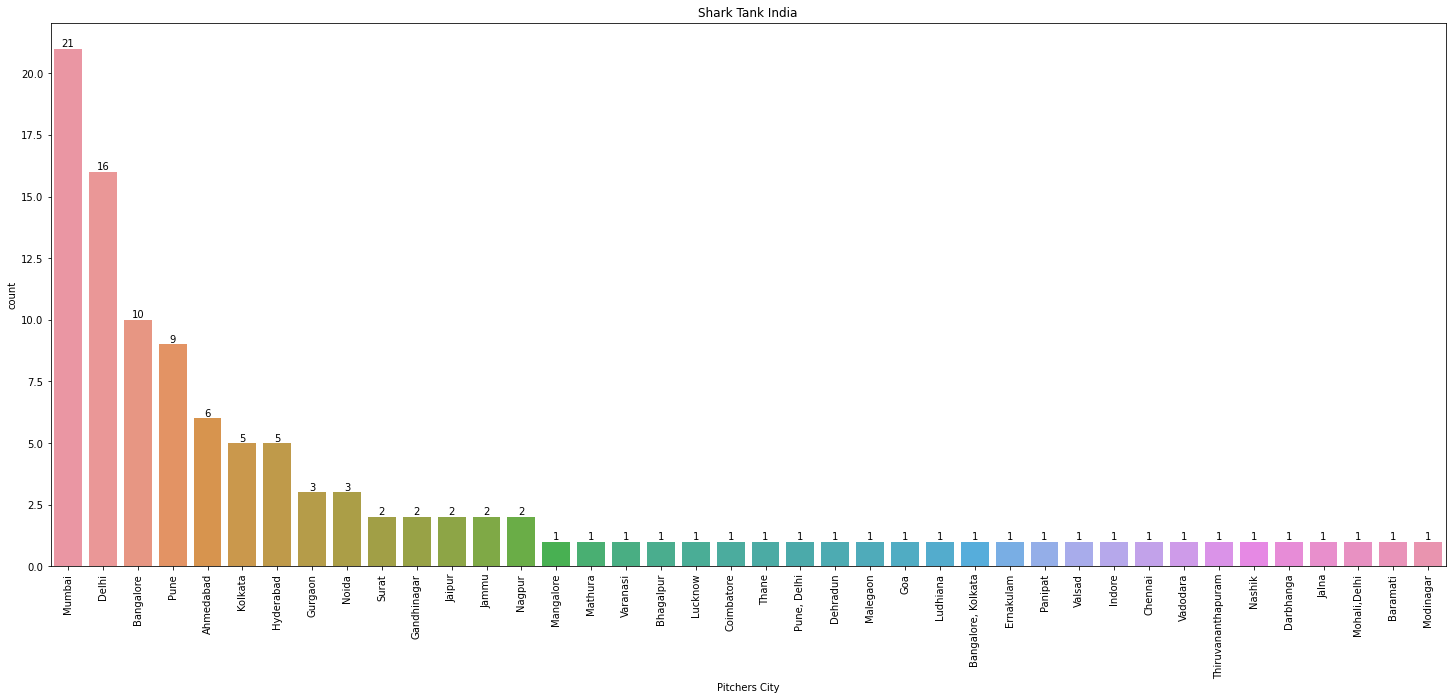

In [46]:
print(shark_tank['Pitchers City'].value_counts(), "\n")

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.title("Shark Tank India")
ax = sns.countplot(x = "Pitchers City", data = shark_tank, order = shark_tank['Pitchers City'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)

## Distribution of States from where Pitchers came 

Maharashtra               37
Delhi                     16
Gujarat                   13
Karnataka                 11
Uttar Pradesh              7
Telangana                  5
West Bengal                5
Haryana                    4
Jammu & Kashmir            2
Rajasthan                  2
Tamil Nadu                 2
Kerala                     2
Bihar                      2
Punjab                     2
Madhya Pradesh             1
Karnataka, West Bengal     1
Punjab, Delhi              1
Uttarakhand                1
Goa                        1
Maharashtra, Delhi         1
Name: Pitchers State, dtype: int64


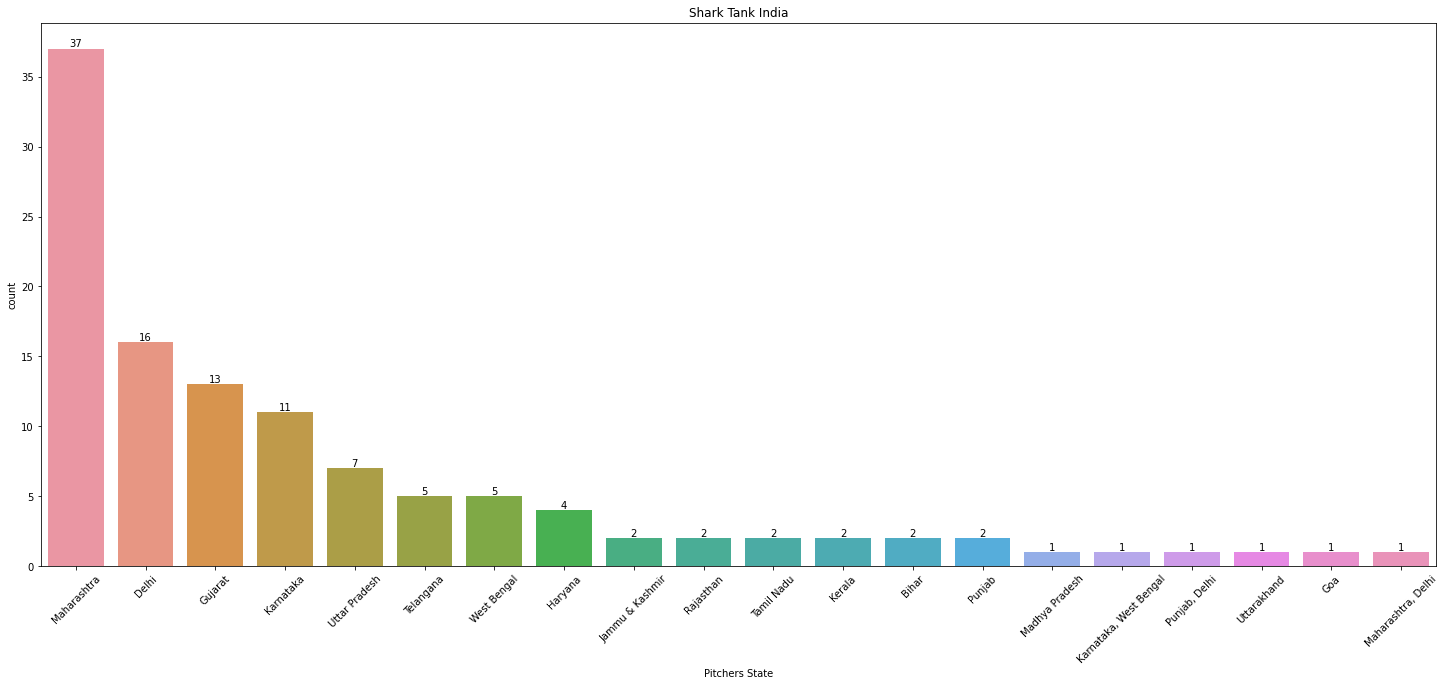

In [47]:
print(shark_tank['Pitchers State'].value_counts())

plt.figure(figsize=(25,10))
plt.xticks(rotation=45)
ax = sns.countplot(x = shark_tank['Pitchers State'], order = shark_tank['Pitchers State'].value_counts().index)
plt.title("Shark Tank India")
for i in ax.containers:
    ax.bar_label(i,)

2019.0    22
2020.0    14
2016.0    13
2021.0    12
2018.0    12
2017.0    11
2015.0     4
2014.0     3
2005.0     1
2013.0     1
2012.0     1
2022.0     1
Name: Started in, dtype: int64


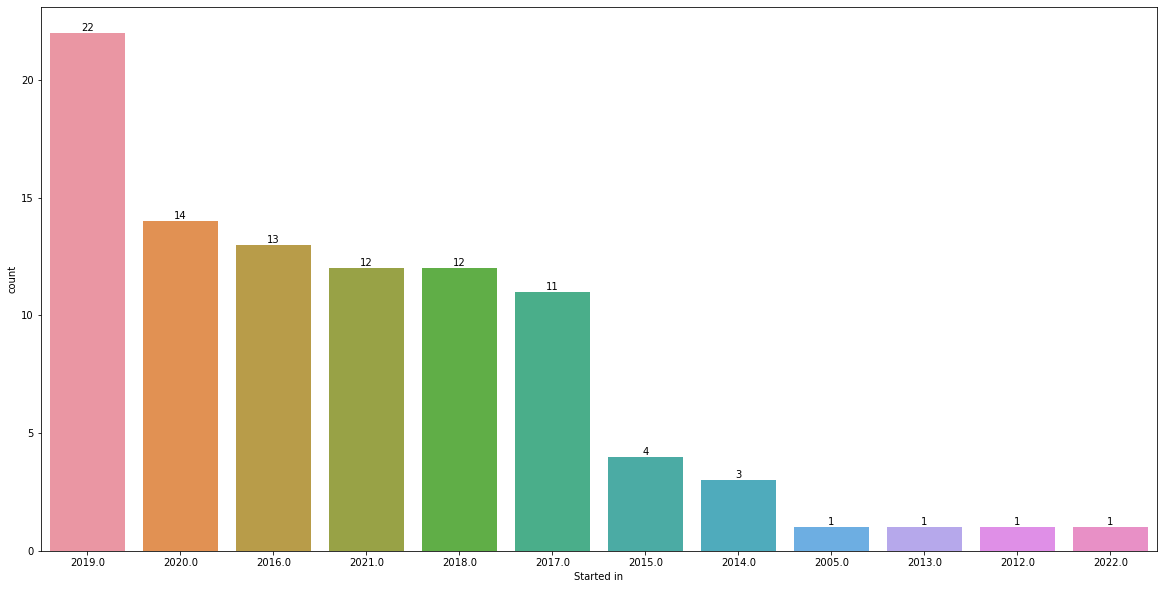

In [48]:
print(shark_tank['Started in'].value_counts())

plt.figure(figsize=(20,10))
ax = sns.countplot(x = shark_tank['Started in'], order = shark_tank['Started in'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)

## Distribution of different industries that came for pitching

Food                   37
Beauty/Fashion         22
Manufacturing          17
Technology             11
Education               8
Services                7
Medical                 7
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Name: Industry, dtype: int64


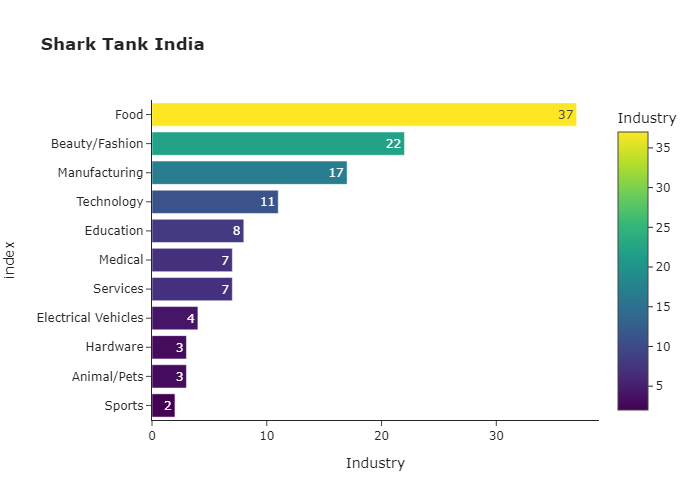

In [49]:
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank India </b>",color = "Industry", template='simple_white', text=tmp)
fig.show("png")

## Gender wise distribution

In [50]:
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total Male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "% (data incomplete)\n", sep='')

Total pitchers - 252 

Total Male pitchers - 177 

Total female pitchers - 75 

Male entrepreneurs percentage - 70.24%

Female entrepreneurs percentage - 29.76%

Couple entrepreneurs percentage - 9.92% (data incomplete)



## Top 10 brands having Highest Yearly Revenue 

Startup Name
French Crown          7200.0
Guardian Gears        2500.0
Raising Superstars    1300.0
PlayBoxTV             1020.0
Alpino                1000.0
Hammer Lifestyle      1000.0
Shades of Spring       900.0
Tagz Foods             700.0
Devnagri               500.0
Moonshine              372.0
Name: Yearly Revenue, dtype: float64


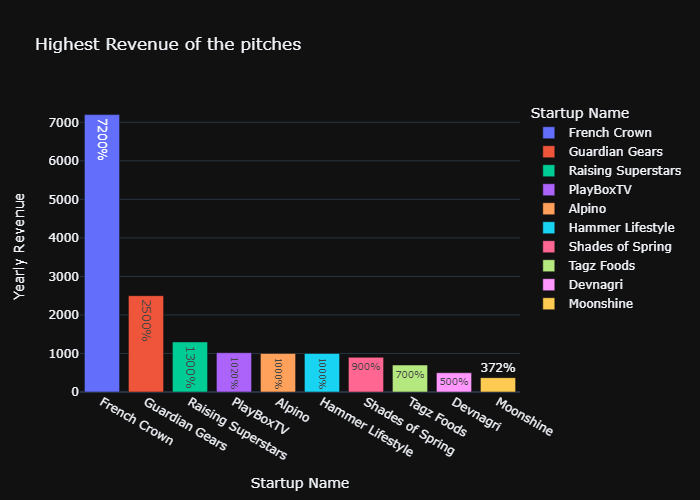

In [51]:
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", title="Highest Revenue of the pitches", text=tmpdf['Yearly Revenue'].map(int).map(str) + "%")
fig.show("png")

## Top 10 brands having Highest Gross Margin

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
Auli                   80.0
Cos IQ                 75.0
Thea and Sid           75.0
Bummer                 70.0
French Crown           70.0
Moonshine              70.0
Nomad Food Project     70.0
Name: Gross Margin, dtype: float64


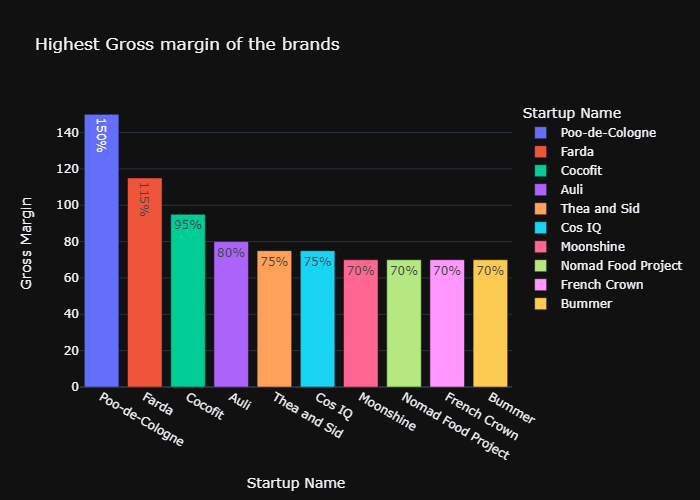

In [52]:
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", title="Highest Gross margin of the brands", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show("png")

## How many accepted or rejected Shark's Offers?

1    73%
0    27%
Name: Received Offer, dtype: object 



<AxesSubplot:xlabel='Received Offer', ylabel='count'>

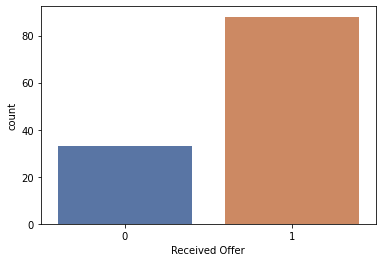

In [53]:
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=shark_tank, palette='deep')

73% companies received investments while 27% startups could not get offers.

1.0    76%
0.0    24%
Name: Accepted Offer, dtype: object 



<AxesSubplot:xlabel='Accepted Offer', ylabel='count'>

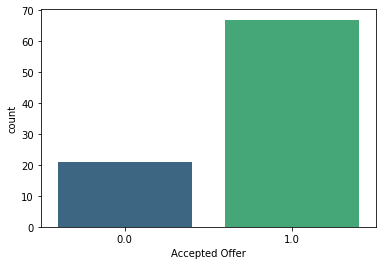

In [54]:
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

76% Companies accepted investments they got and 24% startups did not accepted the offers.

## Pitchers/Companies who rejected Shark's Offers

In [55]:
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Original Ask Amount","Original Ask Equity","Valuation Requested","Valuation Offered"]]

,Startup Name,Original Ask Amount,Original Ask Equity,Valuation Requested,Valuation Offered
6,qZense Labs,100.0,0.25,40000,NaN
19,Torch-it,75.0,1.00,7500,NaN
20,La Kheer Deli,50.0,7.50,667,NaN
26,Kabira Handmad,100.0,5.00,2000,NaN
40,Morriko Pure Foods,100.0,3.00,3333,NaN
54,India Hemp and Co,50.0,4.00,1250,NaN
59,Keto India,150.0,1.25,12000,NaN
69,Moonshine,80.0,0.50,16000,NaN
70,Falhari,50.0,2.00,2500,NaN
72,Urban Monkey,100.0,1.00,10000,NaN


## Top 14 Investments

Startup Name
Aas Vidyalaya          150.0
Annie                  105.0
Get-A-Whey             100.0
Hammer Lifestyle       100.0
Humpy A2               100.0
IN A CAN               100.0
Insurance Samadhan     100.0
Proxgy                 100.0
Raising Superstars     100.0
Revamp Moto            100.0
Skippi Ice Pops        100.0
Sunfox Technologies    100.0
The Renal Project      100.0
The Yarn Bazaar        100.0
Name: Total Deal Amount, dtype: float64


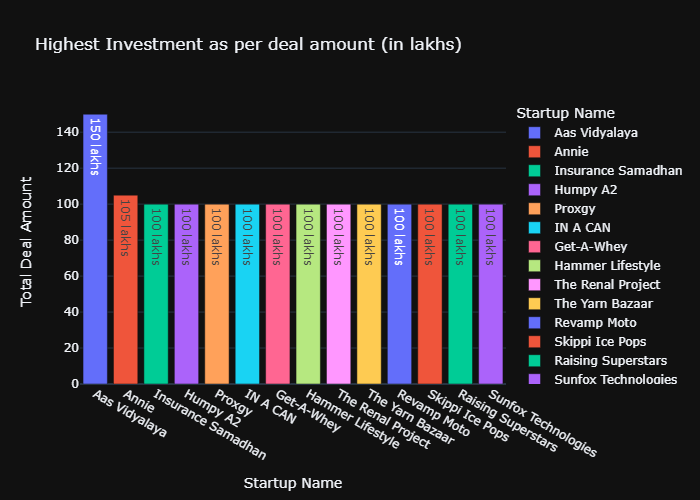

In [56]:
#Top 14 investments as per total deal/investment amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(14))

tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:14]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'].map(int).map(str) + " lakhs")
fig.show("png")

## Which Shark invested the most and the least?

In [57]:
# Maximum Investment - as per Investment Amount
print("Aman invested -", max(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Aman invested - 8.94490016 crores


In [58]:
# Minimum Investment - as per Investment Amount
print("Ghazal invested -", min(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Ghazal invested - 1.299902525 crores


## Industry wise investments by different Sharks

Food                   8
Electrical Vehicles    3
Education              3
Manufacturing          2
Beauty/Fashion         2
Animal/Pets            1
Sports                 1
Technology             1
Name: Industry, dtype: int64


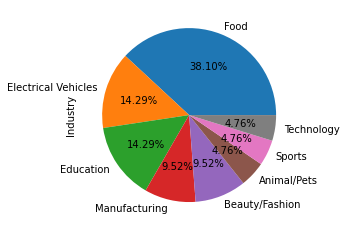

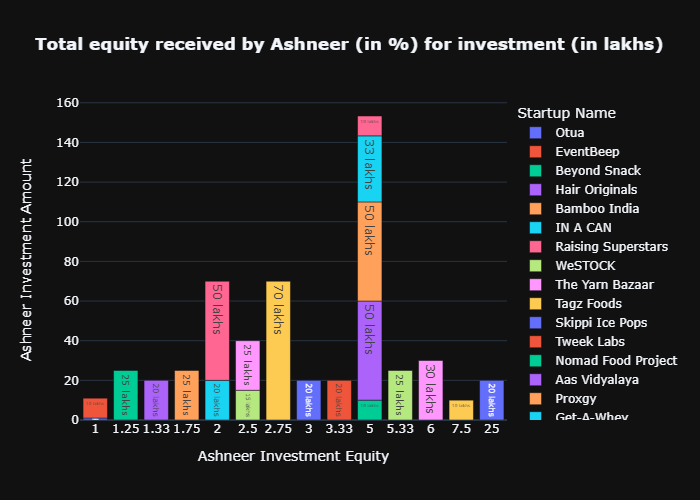

In [59]:
# Ashneer Grover's Investment
print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show("png")

Beauty/Fashion    7
Food              6
Education         3
Medical           3
Manufacturing     2
Animal/Pets       1
Sports            1
Services          1
Name: Industry, dtype: int64


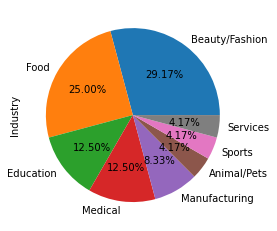

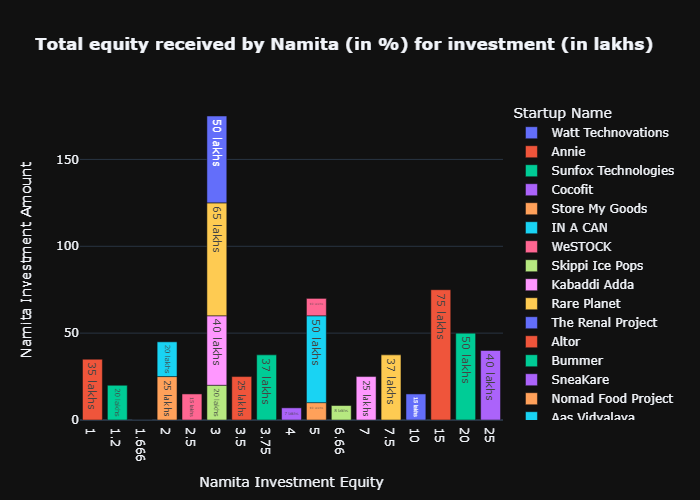

In [60]:
# Namita Thapar's Investment
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show("png")

Food                   8
Beauty/Fashion         4
Electrical Vehicles    1
Medical                1
Manufacturing          1
Sports                 1
Name: Industry, dtype: int64


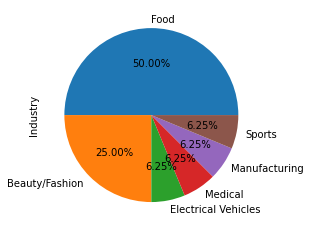

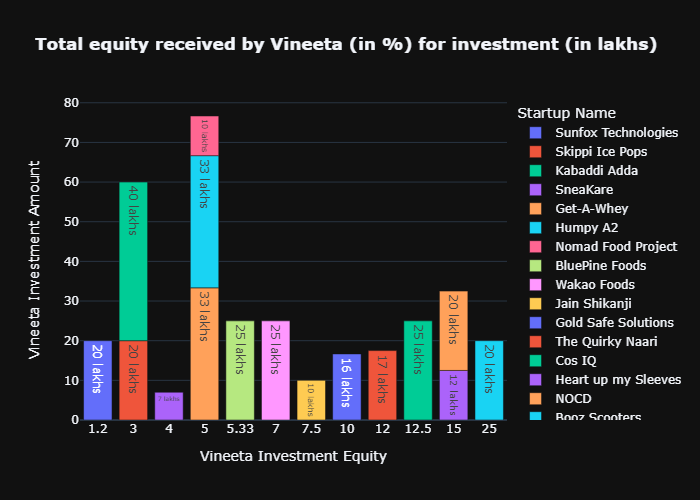

In [61]:
# Vineeta singh's Investments
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show("png")

Manufacturing     4
Beauty/Fashion    4
Food              4
Technology        4
Medical           3
Education         3
Hardware          2
Services          2
Animal/Pets       1
Sports            1
Name: Industry, dtype: int64


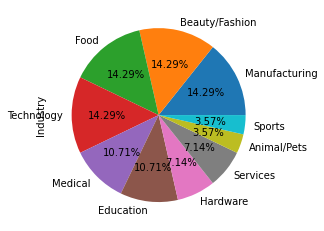

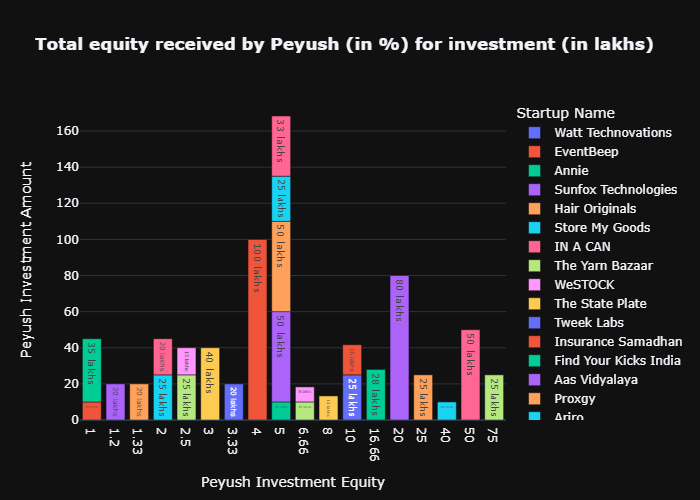

In [62]:
# Peyush Bansal's Investments
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show("png")

Beauty/Fashion         6
Food                   6
Manufacturing          4
Medical                3
Electrical Vehicles    1
Technology             1
Education              1
Animal/Pets            1
Sports                 1
Name: Industry, dtype: int64


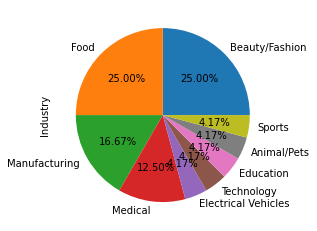

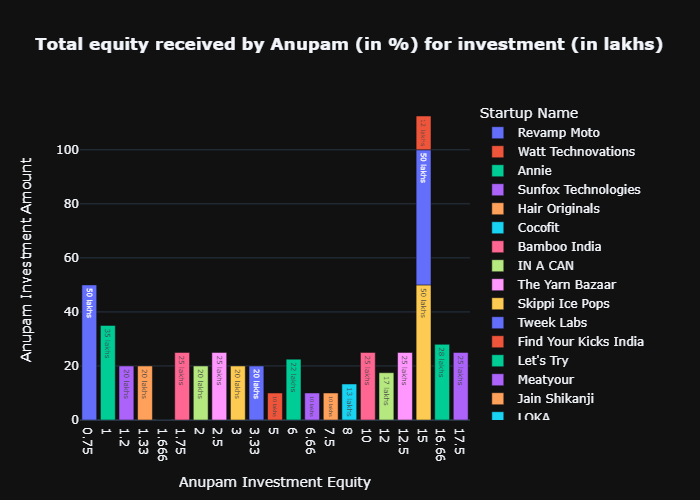

In [63]:
# Anupam Mittal's Investments
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show("png")

Food                   11
Beauty/Fashion          6
Manufacturing           4
Education               2
Technology              2
Medical                 2
Electrical Vehicles     1
Animal/Pets             1
Name: Industry, dtype: int64


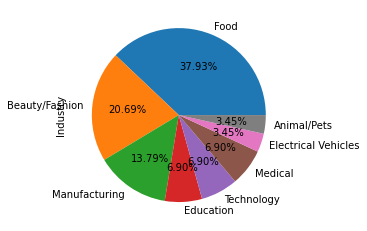

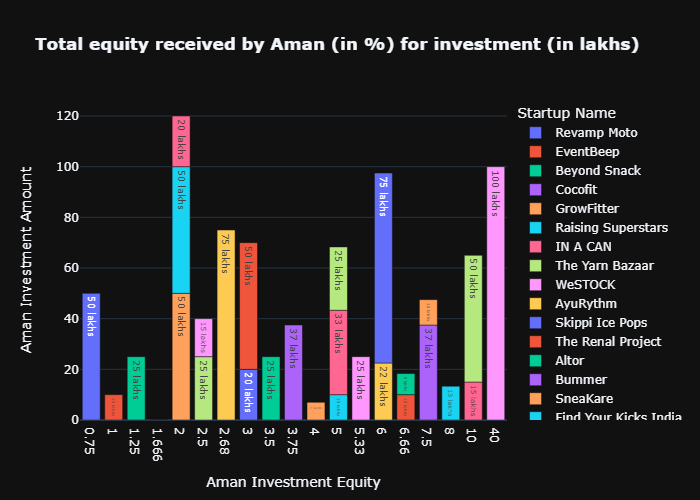

In [64]:
# Aman Gupta's Investments
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show("png")

Food              3
Medical           2
Beauty/Fashion    1
Manufacturing     1
Name: Industry, dtype: int64


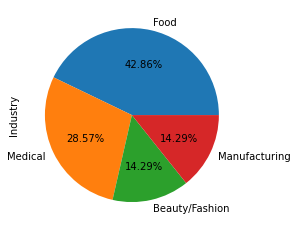

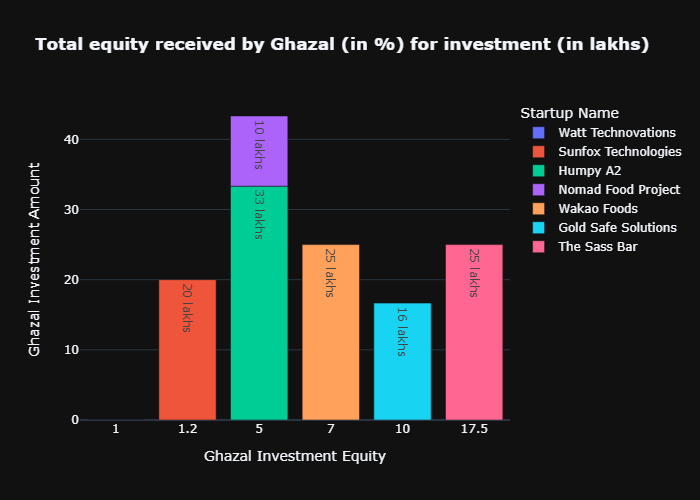

In [65]:
# Ghazal Alagh's Investments
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show("png")

## Number of Sharks in a Deal

1.0    33%
2.0    31%
3.0    22%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object
The deals where more than or equals to 5 sharks are involved
             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
49  Find Your Kicks India               50.0               25.0
63               IN A CAN              100.0               10.0
79    Sunfox Technologies              100.0                6.0


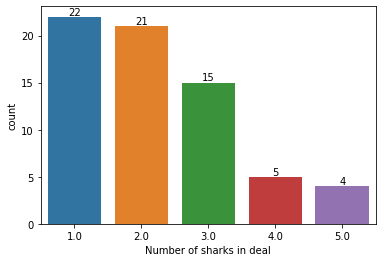

In [66]:
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
print('The deals where more than or equals to 5 sharks are involved')
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])
for i in ax.containers:
    ax.bar_label(i,)

## Total amount asked by Pitchers

In [67]:
print(format_currency(shark_tank['Original Ask Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹378.23 crores


## Total Amount invested by the Sharks

In [68]:
print(format_currency(shark_tank['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹39.03 crores


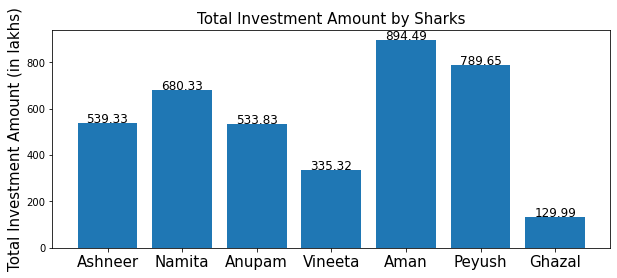

In [69]:
Amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Ghazal Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=15)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()

## Portfolios of different Sharks

In [70]:
# Peyush Bansal's Portfolio
print("Peyush Bansal's total investments", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].reset_index())

Peyush Bansal's total investments 28
Investment amount by Peyush 7.9 crores

Equity received by Peyush 317.84 % in different companies

Debt/loan amount by Peyush 1.17 crores

--------------------------------------------------------------------------------
    index           Startup Name        Industry  Peyush Investment Amount
0      22    Vivalyf Innovations         Medical                 28.000000
1      25                  Ariro   Manufacturing                 25.000000
2      27                Nuutjob  Beauty/Fashion                  8.330000
3      28               Meatyour            Food                 10.000000
4      29              EventBeep       Education                 10.000000
5      35                   LOKA      Technology                 13.330000
6      36                  Annie       Education                 35.000000
7      37             Carragreen   Manufacturing                 25.000000
8      38        The Yarn Bazaar   Manufacturing                 25.

In [71]:
# Aman Gupta's Portfolio
print("Aman Gupta's total investments", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].reset_index())

Aman Gupta's total investments 29
Investment amount by Aman 8.94 crores

Equity received by Aman 164.25 % in different companies

Debt/loan amount by Aman 0.5 crores

--------------------------------------------------------------------------------
    index           Startup Name             Industry  Aman Investment Amount
0       0         BluePine Foods                 Food               25.000000
1       7              Peeschute       Beauty/Fashion               75.000000
2      11                 Bummer       Beauty/Fashion               37.500000
3      12            Revamp Moto  Electrical Vehicles               50.000000
4      15        Skippi Ice Pops                 Food               20.000000
5      18     Raising Superstars            Education               50.000000
6      21           Beyond Snack                 Food               25.000000
7      24                  Altor        Manufacturing               25.000000
8      25                  Ariro        Manufactur

In [72]:
# Ghazal Alagh's Portfolio
print("Ghazal Alagh's total investments", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]])

Ghazal Alagh's total investments  7
Investment amount by Ghazal 1.3 crores

Equity received by Ghazal 46.7 % in different companies

Debt/loan amount by Ghazal 0.0 crores

--------------------------------------------------------------------------------
            Startup Name        Industry  Ghazal Investment Amount
75          The Sass Bar  Beauty/Fashion                 25.000000
79   Sunfox Technologies         Medical                 20.000000
85    Watt Technovations         Medical                  0.000253
88              Humpy A2            Food                 33.330000
90   Gold Safe Solutions   Manufacturing                 16.660000
91           Wakao Foods            Food                 25.000000
110   Nomad Food Project            Food                 10.000000


In [73]:
# Asgneer Grover's Portfolio
print("Ashneer Grover's total investments", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]])

Ashneer Grover's total investments 21
Investment amount by Ashneer 5.39 crores

Equity received by Ashneer 93.24 % in different companies

Debt/loan amount by Ashneer 1.14 crores

--------------------------------------------------------------------------------
              Startup Name             Industry  Ashneer Investment Amount
0           BluePine Foods                 Food                      25.00
1            Booz Scooters  Electrical Vehicles                      20.00
3               Tagz Foods                 Food                      70.00
15         Skippi Ice Pops                 Food                      20.00
18      Raising Superstars            Education                      50.00
21            Beyond Snack                 Food                      25.00
23           Motion Breeze  Electrical Vehicles                      30.00
29               EventBeep            Education                      10.00
38         The Yarn Bazaar        Manufacturing                 

In [74]:
# Nmita Thapar's Portfolio
print("Namita Thapar's Total Investments", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]])

Namita Thapar's Total Investments 24
Investment amount by Namita 6.8 crores

Equity received by Namita 140.78 % in different companies

Debt/loan amount by Namita 0.25 crores

--------------------------------------------------------------------------------
              Startup Name        Industry  Namita Investment Amount
11                  Bummer  Beauty/Fashion                 37.500000
15         Skippi Ice Pops            Food                 20.000000
16            Menstrupedia       Education                 50.000000
24                   Altor   Manufacturing                 25.000000
27                 Nuutjob  Beauty/Fashion                  8.330000
32                   Farda  Beauty/Fashion                 15.000000
33                    Auli  Beauty/Fashion                 75.000000
36                   Annie       Education                 35.000000
39       The Renal Project         Medical                 50.000000
44                 Cocofit            Food           

In [75]:
# Anupam Mittal's Portfolio
print("Anupam Mittal's total investments", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]])

Anupam Mittal's total investments 24
Investment amount by Anupam 5.34 crores

Equity received by Anupam 166.35 % in different companies

Debt/loan amount by Anupam 0.15 crores

--------------------------------------------------------------------------------
                 Startup Name             Industry  Anupam Investment Amount
2         Heart up my Sleeves       Beauty/Fashion                 12.500000
9                      Cos IQ       Beauty/Fashion                 25.000000
12                Revamp Moto  Electrical Vehicles                 50.000000
15            Skippi Ice Pops                 Food                 20.000000
22        Vivalyf Innovations              Medical                 28.000000
28                   Meatyour                 Food                 10.000000
31   ARRCOAT Surface Textures        Manufacturing                 50.000000
35                       LOKA           Technology                 13.330000
36                      Annie            Educatio

In [76]:
# Vineeta Singh's Portfolio
print("Vineeta Singh's total investments", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]])

Vineeta Singh's total investments 16
Investment amount by Vineeta 3.35 crores

Equity received by Vineeta 135.53 % in different companies

Debt/loan amount by Vineeta 0.3 crores

--------------------------------------------------------------------------------
            Startup Name             Industry  Vineeta Investment Amount
0         BluePine Foods                 Food                      25.00
1          Booz Scooters  Electrical Vehicles                      20.00
2    Heart up my Sleeves       Beauty/Fashion                      12.50
8                   NOCD                 Food                      20.00
9                 Cos IQ       Beauty/Fashion                      25.00
15       Skippi Ice Pops                 Food                      20.00
64            Get-A-Whey                 Food                      33.33
66      The Quirky Naari       Beauty/Fashion                      17.50
79   Sunfox Technologies              Medical                      20.00
88        

## Top Investments as per Equity Amount

Startup Name
Sid07 Designs            75.00
Booz Scooters            50.00
Isak Fragrances          50.00
Hammer Lifestyle         40.00
KG Agrotech              40.00
The Sass Bar             35.00
Vivalyf Innovations      33.33
Gold Safe Solutions      30.00
Heart up my Sleeves      30.00
Jain Shikanji            30.00
Colour Me Mad - CMM      25.00
Cos IQ                   25.00
Find Your Kicks India    25.00
PNT                      25.00
LOKA                     24.00
Name: Total Deal Equity, dtype: float64


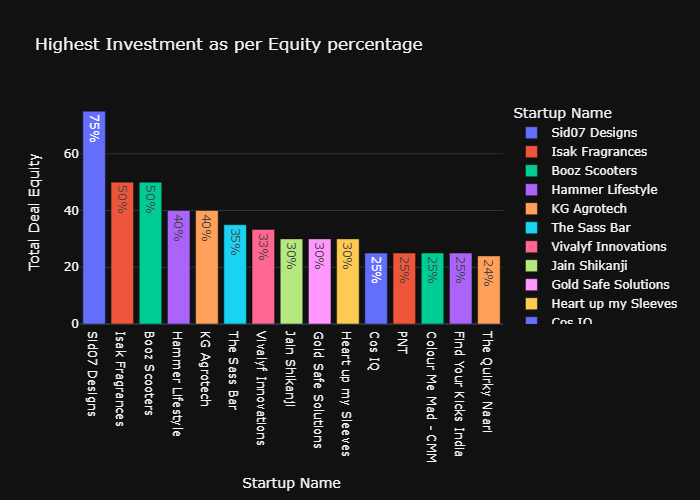

In [77]:
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15))
df1 = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:15]
fig = px.bar(df1, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=df1['Total Deal Equity'].map(int).map(str)+'%')
fig.show("png")

## Top Investments as per Loan Amount

Startup Name
Otua                        99.0
Namhya Foods                50.0
Store My Goods              50.0
Bamboo India                30.0
NOCD                        30.0
PNT                         25.0
The State Plate             25.0
Sid07 Designs               22.0
KG Agrotech                 20.0
ARRCOAT Surface Textures     NaN
Aas Vidyalaya                NaN
Agri tourism                 NaN
Aliste Technologies          NaN
Alpino                       NaN
Altor                        NaN
Name: Total Deal Debt, dtype: float64


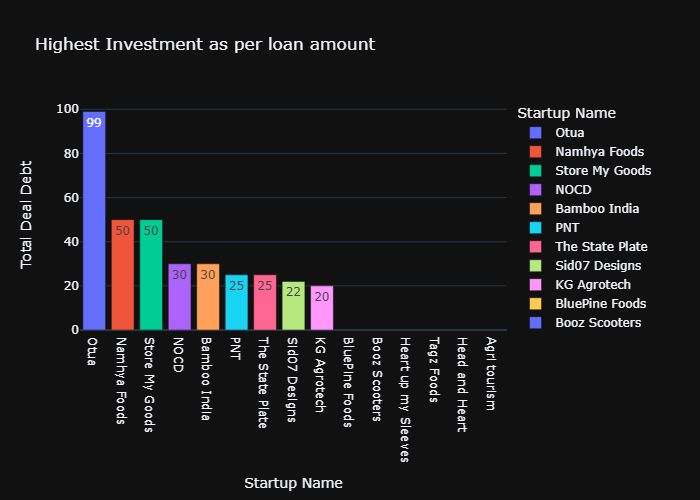

In [78]:
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(15))
df1 = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:15]
fig = px.bar(df1, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per loan amount", text=df1['Total Deal Debt'])
fig.show("png")

## Total Equity Received by Sharks

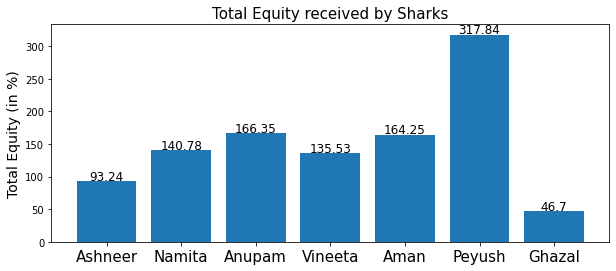

In [79]:
Equity = [shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks", fontsize=15)
plt.show()

## Companies who got same valuation as they requested

In [80]:
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

,Startup Name,Valuation Requested,Valuation Offered
21,Beyond Snack,2000,2000.0
44,Cocofit,0,0.0
85,Watt Technovations,0,0.0


## Some companies were on pre-revenue or didn't had any revenue (as of pitching day)

In [81]:
df2 = shark_tank.loc[shark_tank['Yearly Revenue'] == 0]
print(df2['Startup Name'])

23        Motion Breeze
41      Good Good Piggy
82     Julaa Automation
97             Scholify
99           Sabjikothi
113             On2Cook
Name: Startup Name, dtype: object


In [82]:
# Few companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

,Startup Name,Original Ask Amount,Total Deal Amount
0,BluePine Foods,50.0,75.0
15,Skippi Ice Pops,45.0,100.0
36,Annie,30.0,105.0
38,The Yarn Bazaar,50.0,100.0
42,Hammer Lifestyle,30.0,100.0
58,WeSTOCK,50.0,60.0
63,IN A CAN,50.0,100.0
75,The Sass Bar,40.0,50.0
88,Humpy A2,75.0,100.0
108,Tweek Labs,40.0,60.0


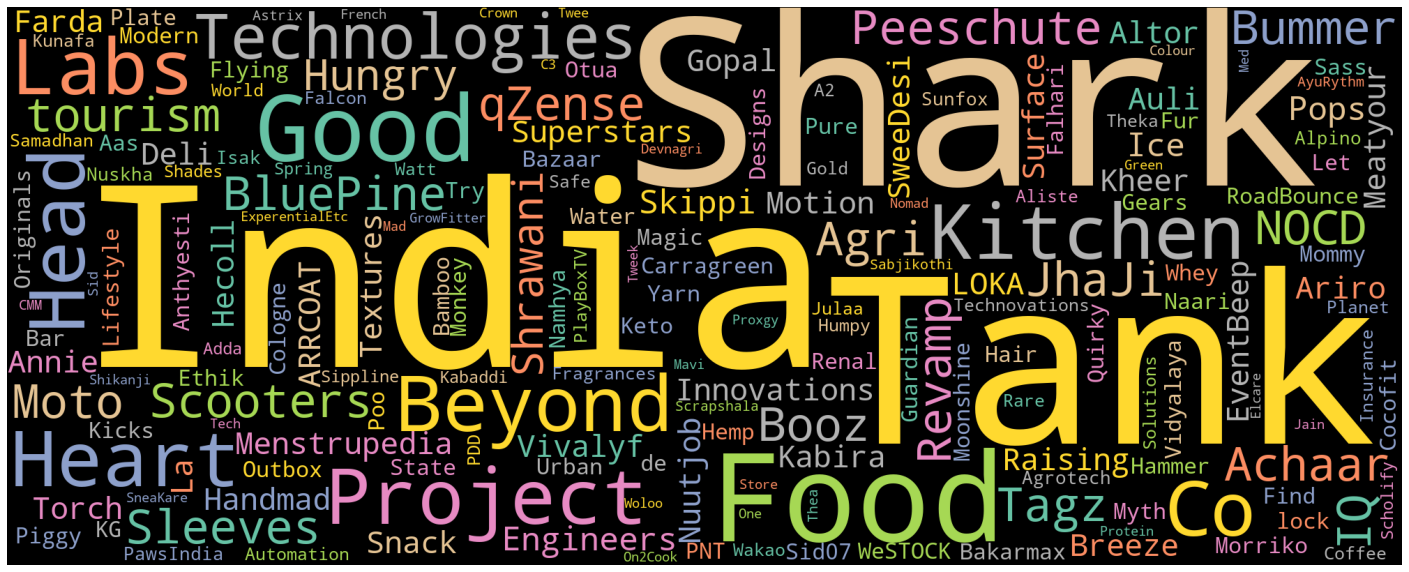

In [83]:
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=800, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
